In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + bonus : 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 357.17it/s]


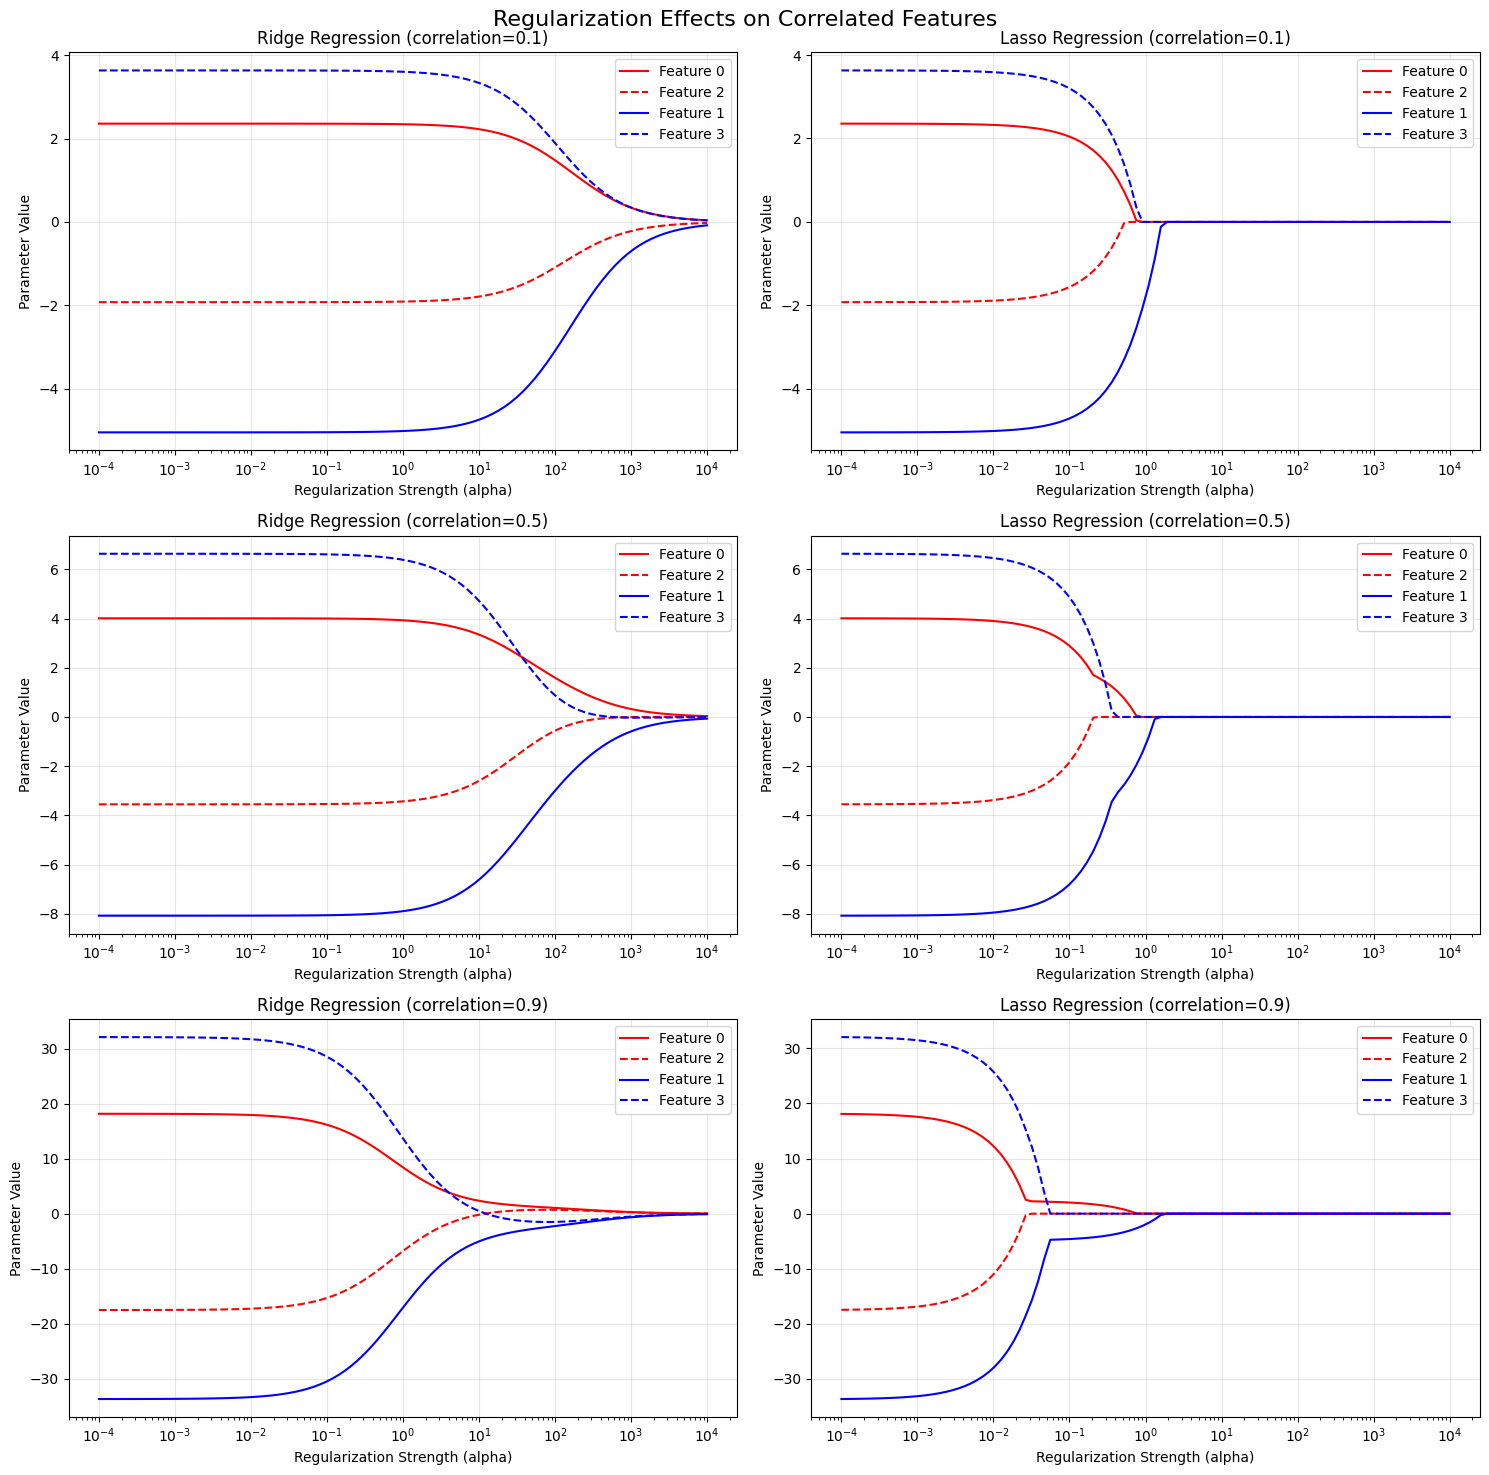

In [3]:
from tqdm import tqdm

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Regularization Effects on Correlated Features', fontsize=16)

for idx, correlation in enumerate([0.1, 0.5, 0.9]):
    X, y = gen_data(500, correlation)

    alpha_values = np.logspace(-4, 4, 100, base=10)

    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)

        lasso = Lasso(alpha=alpha, fit_intercept=False)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)

    ax_ridge = axes[idx, 0]
    ax_ridge.plot(alpha_values, params_ridge[:, 0], color='red', label='Feature 0')
    ax_ridge.plot(alpha_values, params_ridge[:, 2], '--', color='red', label='Feature 2')
    ax_ridge.plot(alpha_values, params_ridge[:, 1], color='blue', label='Feature 1')
    ax_ridge.plot(alpha_values, params_ridge[:, 3], '--', color='blue', label='Feature 3')

    ax_ridge.set_xscale('log')
    ax_ridge.set_xlabel('Regularization Strength (alpha)')
    ax_ridge.set_ylabel('Parameter Value')
    ax_ridge.set_title(f'Ridge Regression (correlation={correlation})')
    ax_ridge.legend()
    ax_ridge.grid(True, alpha=0.3)

    ax_lasso = axes[idx, 1]
    ax_lasso.plot(alpha_values, params_lasso[:, 0], color='red', label='Feature 0')
    ax_lasso.plot(alpha_values, params_lasso[:, 2], '--', color='red', label='Feature 2')
    ax_lasso.plot(alpha_values, params_lasso[:, 1], color='blue', label='Feature 1')
    ax_lasso.plot(alpha_values, params_lasso[:, 3], '--', color='blue', label='Feature 3')

    ax_lasso.set_xscale('log')
    ax_lasso.set_xlabel('Regularization Strength (alpha)')
    ax_lasso.set_ylabel('Parameter Value')
    ax_lasso.set_title(f'Lasso Regression (correlation={correlation})')
    ax_lasso.legend()
    ax_lasso.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
print("OBSERVATIONS AND ANALYSIS:\n")
print("1. RIDGE REGRESSION:")
print("- With low correlation (0.1): All parameters shrink gradually as alpha increases")
print("- With high correlation (0.9): Correlated feature pairs (0-2, 1-3) show similar shrinkage patterns")
print("- Ridge tends to shrink correlated features together, maintaining their relative importance")
print("- No feature selection occurs; all parameters approach zero but never become exactly zero\n")

print("2. LASSO REGRESSION:")
print("- With low correlation (0.1): Features are progressively eliminated as alpha increases")
print("- With high correlation (0.9): Lasso tends to select one feature from each correlated pair")
print("- The chosen feature from correlated pairs appears somewhat arbitrary (depends on data)")
print("- Clear feature selection: parameters become exactly zero at certain alpha thresholds\n")

print("3. COMPARISON:")
print("- Ridge: Better for dealing with multicollinearity, shrinks coefficients smoothly")
print("- Lasso: Performs feature selection, useful when we suspect sparse true parameters")
print("- High correlation amplifies these behavioral differences between the two methods")
print("- Choice depends on whether feature selection is desired and the true underlying model structure")


OBSERVATIONS AND ANALYSIS:

1. RIDGE REGRESSION:
- With low correlation (0.1): All parameters shrink gradually as alpha increases
- With high correlation (0.9): Correlated feature pairs (0-2, 1-3) show similar shrinkage patterns
- Ridge tends to shrink correlated features together, maintaining their relative importance
- No feature selection occurs; all parameters approach zero but never become exactly zero

2. LASSO REGRESSION:
- With low correlation (0.1): Features are progressively eliminated as alpha increases
- With high correlation (0.9): Lasso tends to select one feature from each correlated pair
- The chosen feature from correlated pairs appears somewhat arbitrary (depends on data)
- Clear feature selection: parameters become exactly zero at certain alpha thresholds

3. COMPARISON:
- Ridge: Better for dealing with multicollinearity, shrinks coefficients smoothly
- Lasso: Performs feature selection, useful when we suspect sparse true parameters
- High correlation amplifies these

Short Comment (Summary)

From the results, Ridge regression shrinks coefficients smoothly as the regularization strength increases, and correlated features share similar weights without being eliminated. In contrast, Lasso tends to force sparsity: at higher regularization levels, many coefficients become exactly zero, and only one feature from each correlated pair is retained. As correlation increases, Ridge distributes weights across the group, while Lasso aggressively selects one representative feature. Overall, Ridge is more suitable when dealing with multicollinearity, whereas Lasso is more useful when feature selection is desired.